In [1]:
import pm4py 
import pandas

#choose data sets
#csv_path = 'BPI_Challenge_2012-training.csv'
#xes_path = 'BPI_Challenge_2012.xes'

#import xes file
#log = pm4py.read_xes(xes_path)

#convert event log to dataframe
#df_csv = pm4py.convert_to_dataframe(log)
#generate csv from dataframe
#df_csv.to_csv(csv_path)

#filter data and remove null values
df = pm4py.format_dataframe(pandas.read_csv('BPI_Challenge_2012-training.csv', sep = ","), case_id = 'case concept:name', activity_key = 'event concept:name', timestamp_key = 'event time:timestamp').dropna()
df

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,case:concept:name,concept:name,time:timestamp,@@index
0,0,173688,2011-09-30 22:38:44.546000+00:00,20000,A_SUBMITTED,COMPLETE,2011-01-10 00:38:44.546000+00:00,173688,A_SUBMITTED,2011-01-10 00:38:44.546000+00:00,0
1,1,173688,2011-09-30 22:38:44.546000+00:00,20000,A_PARTLYSUBMITTED,COMPLETE,2011-01-10 00:38:44.880000+00:00,173688,A_PARTLYSUBMITTED,2011-01-10 00:38:44.880000+00:00,1
2,2,173688,2011-09-30 22:38:44.546000+00:00,20000,A_PREACCEPTED,COMPLETE,2011-01-10 00:39:37.906000+00:00,173688,A_PREACCEPTED,2011-01-10 00:39:37.906000+00:00,2
3,3,173688,2011-09-30 22:38:44.546000+00:00,20000,W_Completeren aanvraag,SCHEDULE,2011-01-10 00:39:38.875000+00:00,173688,W_Completeren aanvraag,2011-01-10 00:39:38.875000+00:00,3
89,4,173688,2011-09-30 22:38:44.546000+00:00,20000,W_Completeren aanvraag,START,2011-01-10 11:36:46.437000+00:00,173688,W_Completeren aanvraag,2011-01-10 11:36:46.437000+00:00,89
...,...,...,...,...,...,...,...,...,...,...,...
199718,44955422687236,206318,2012-02-03 16:07:38.334000+00:00,5000,A_DECLINED,COMPLETE,2012-03-02 17:55:57.294000+00:00,206318,A_DECLINED,2012-03-02 17:55:57.294000+00:00,199718
199719,44955422687237,206318,2012-02-03 16:07:38.334000+00:00,5000,W_Afhandelen leads,COMPLETE,2012-03-02 17:56:00.998000+00:00,206318,W_Afhandelen leads,2012-03-02 17:56:00.998000+00:00,199719
199654,44959717654528,206321,2012-02-03 16:08:39.199000+00:00,2000,A_SUBMITTED,COMPLETE,2012-03-02 17:08:39.200000+00:00,206321,A_SUBMITTED,2012-03-02 17:08:39.200000+00:00,199654
199655,44959717654529,206321,2012-02-03 16:08:39.199000+00:00,2000,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:08:39.459000+00:00,206321,A_PARTLYSUBMITTED,2012-03-02 17:08:39.459000+00:00,199655


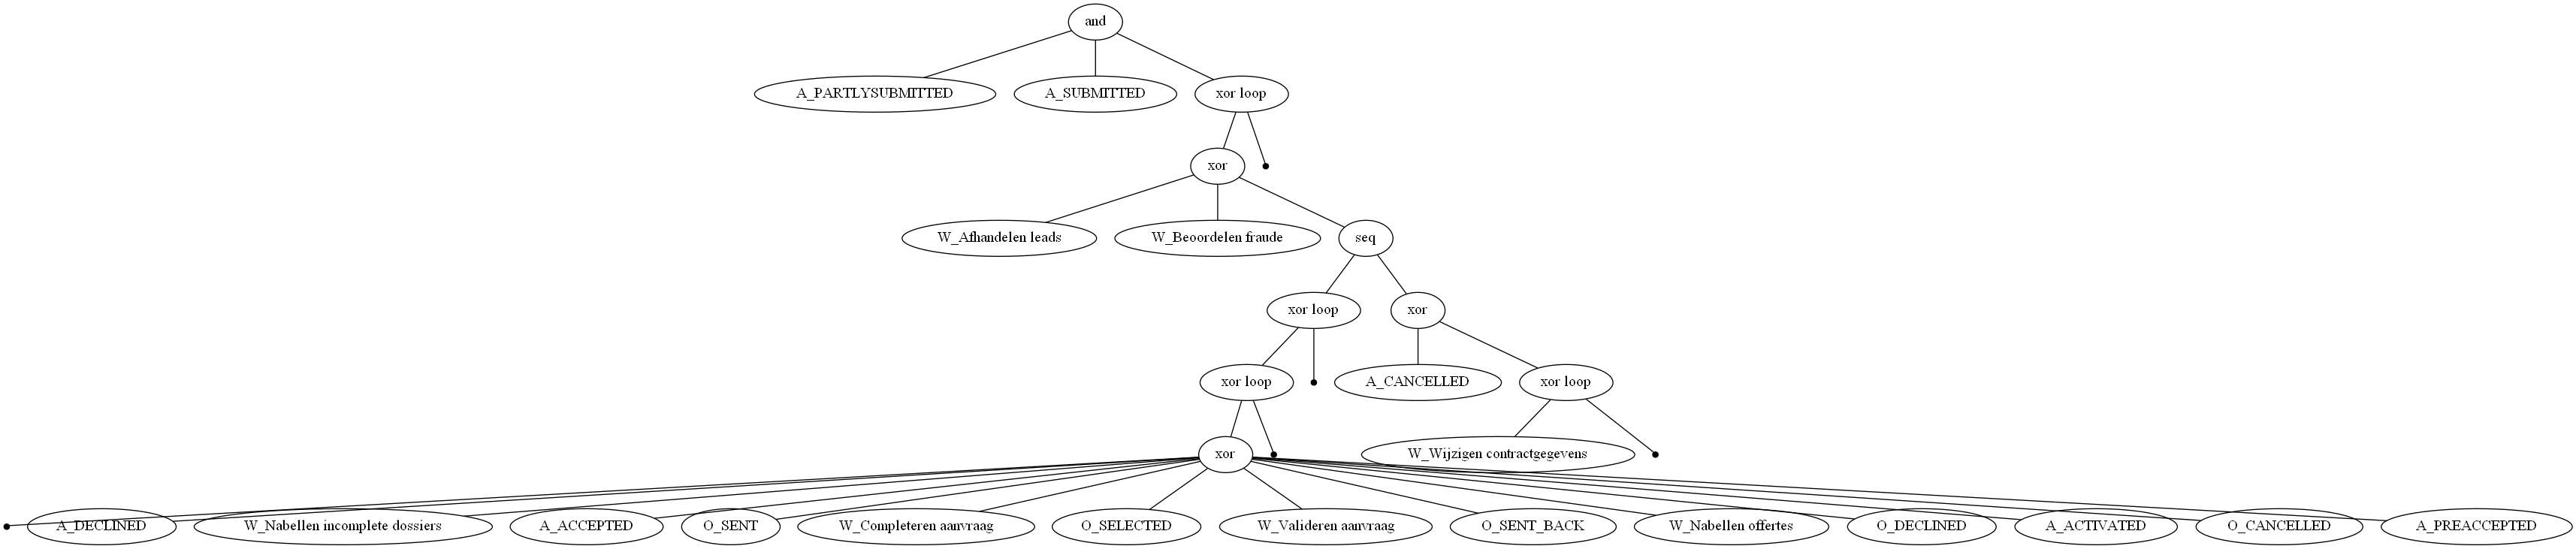

In [2]:
#Process Tree
process_tree = pm4py.discover_process_tree_inductive(df, 1)
pm4py.view_process_tree(process_tree)

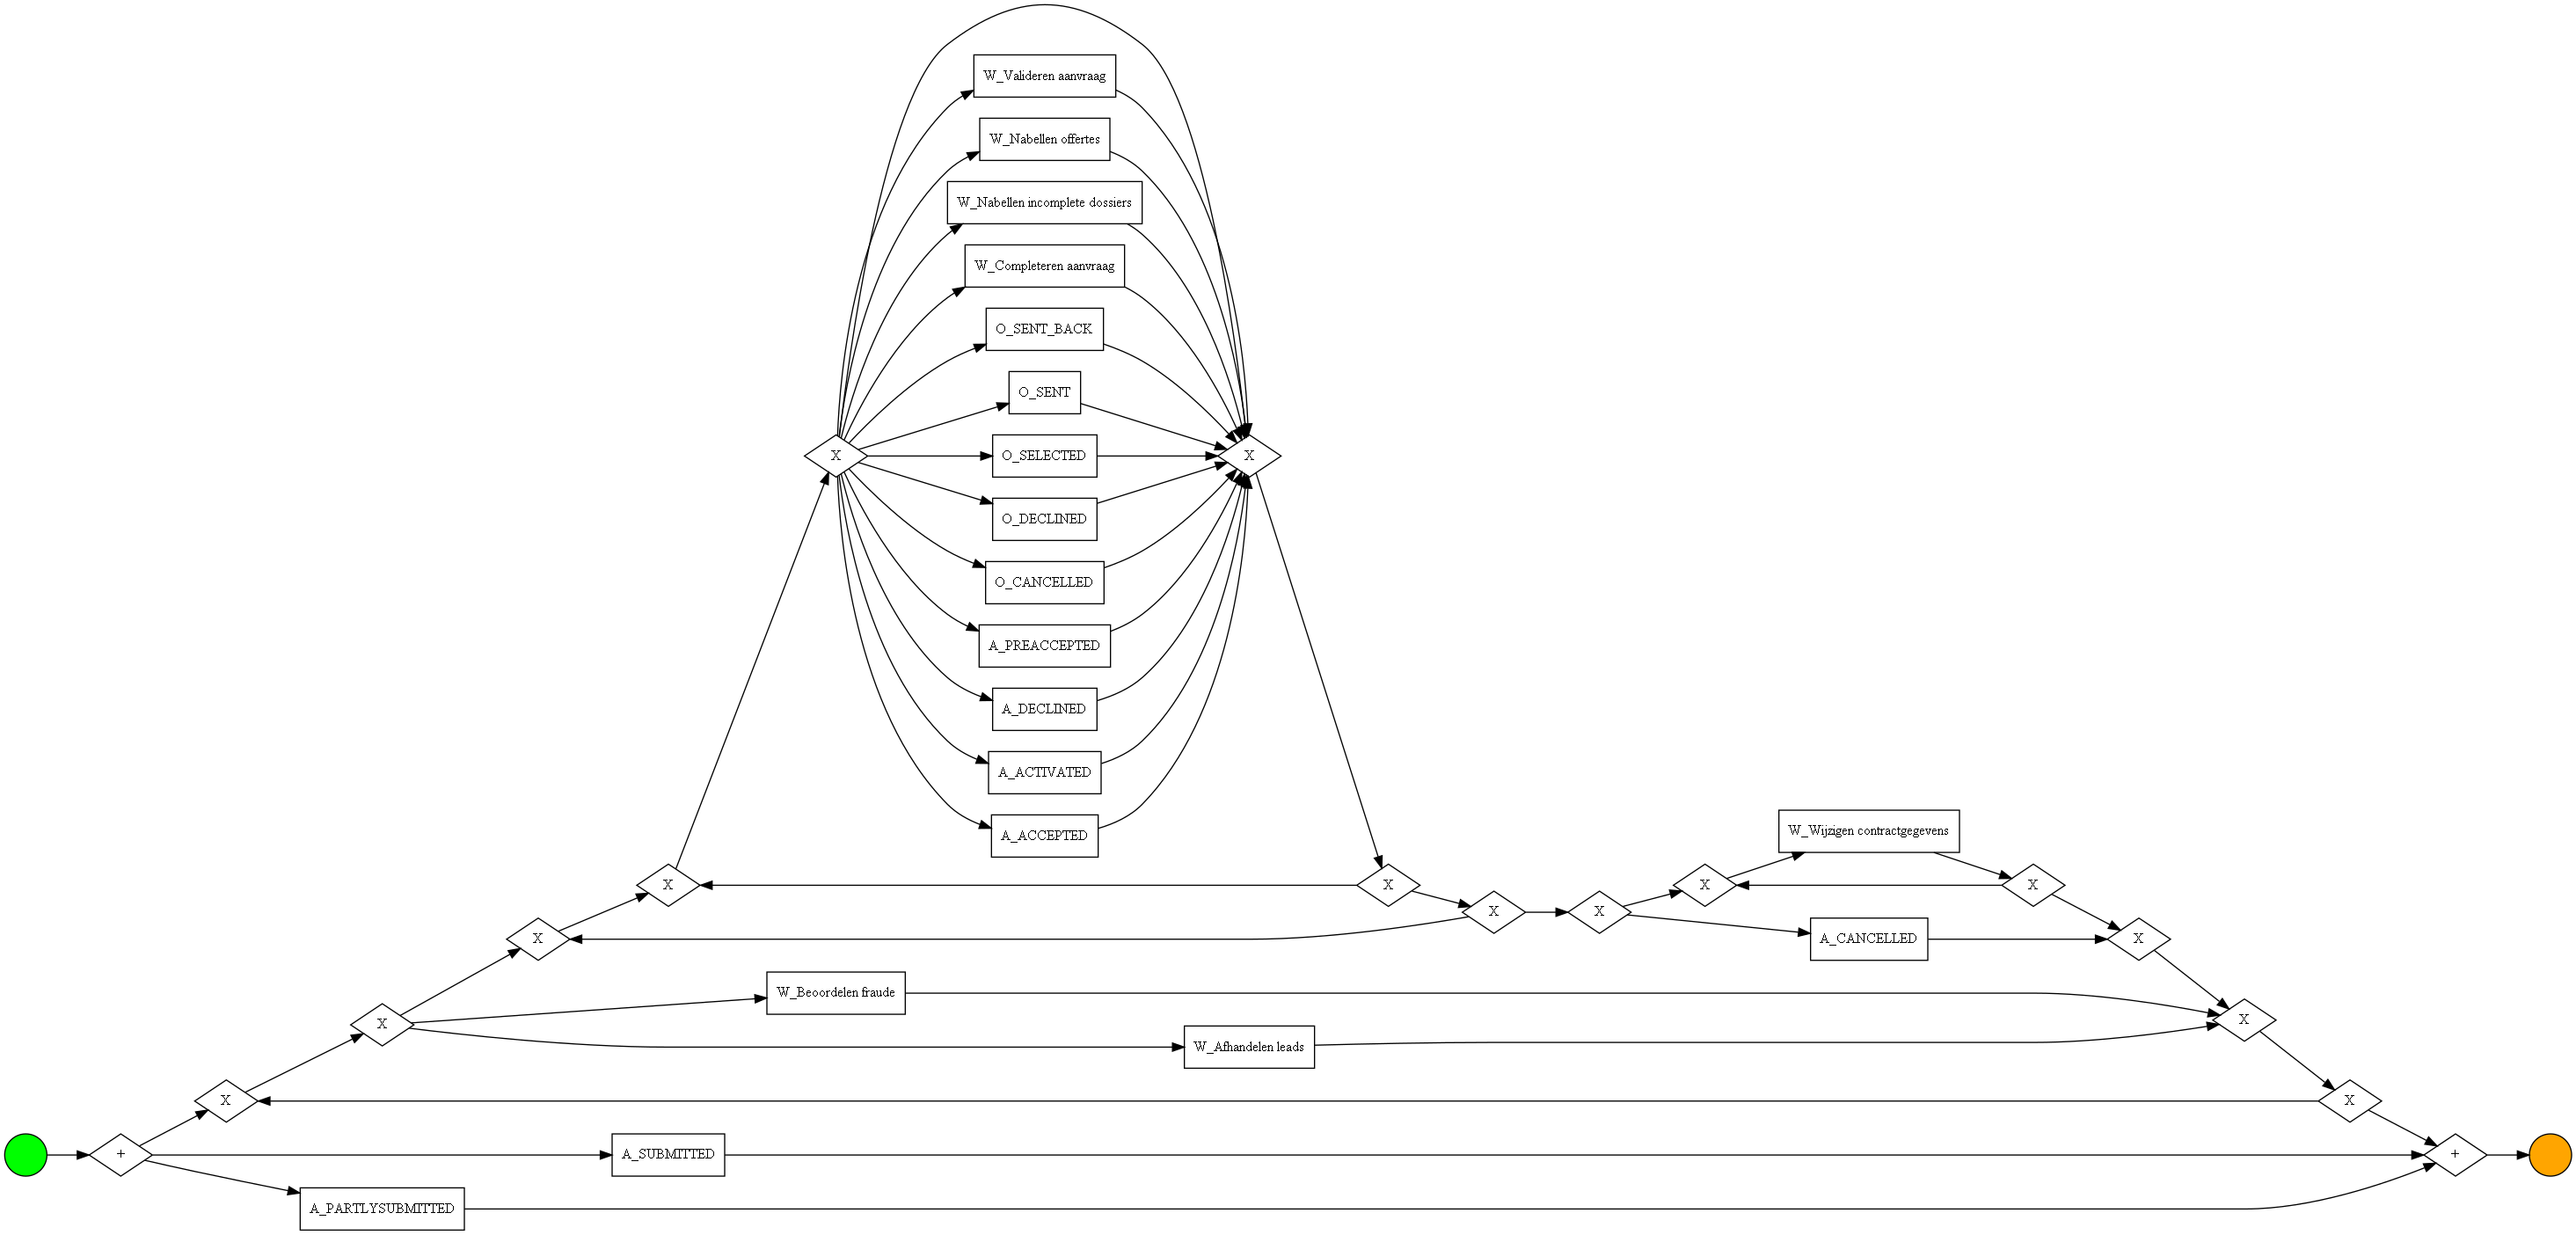

In [3]:
#BPMN
bpmn_model = pm4py.convert_to_bpmn(process_tree, 1)
pm4py.view_bpmn(bpmn_model)

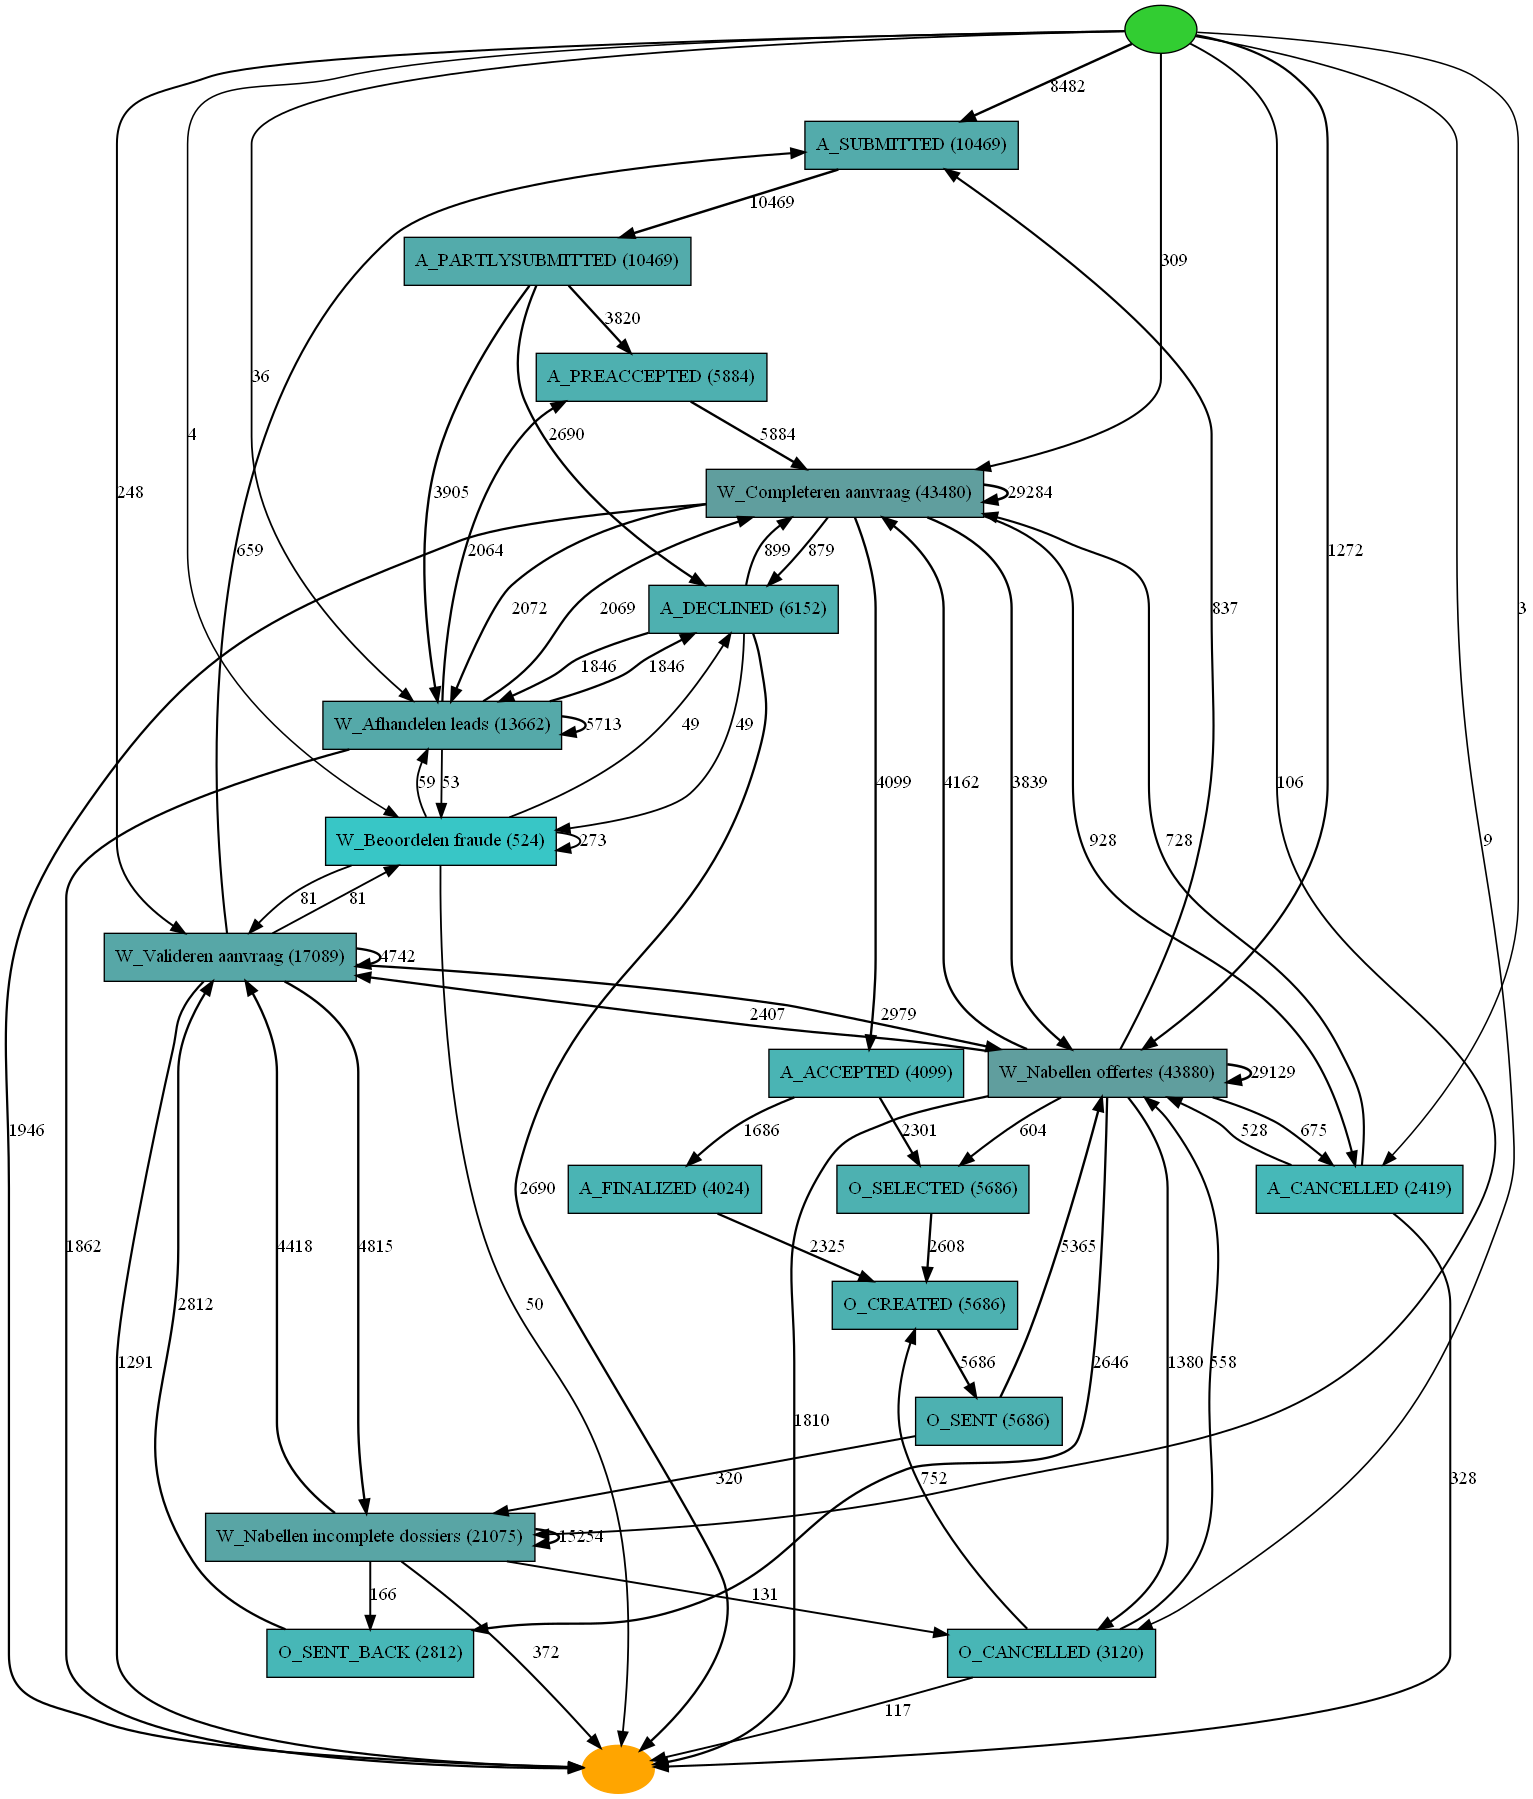

In [4]:
#Heuristic Miner

from pm4py.objects.log.importer.xes import importer as xes_importer
import os

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(df, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


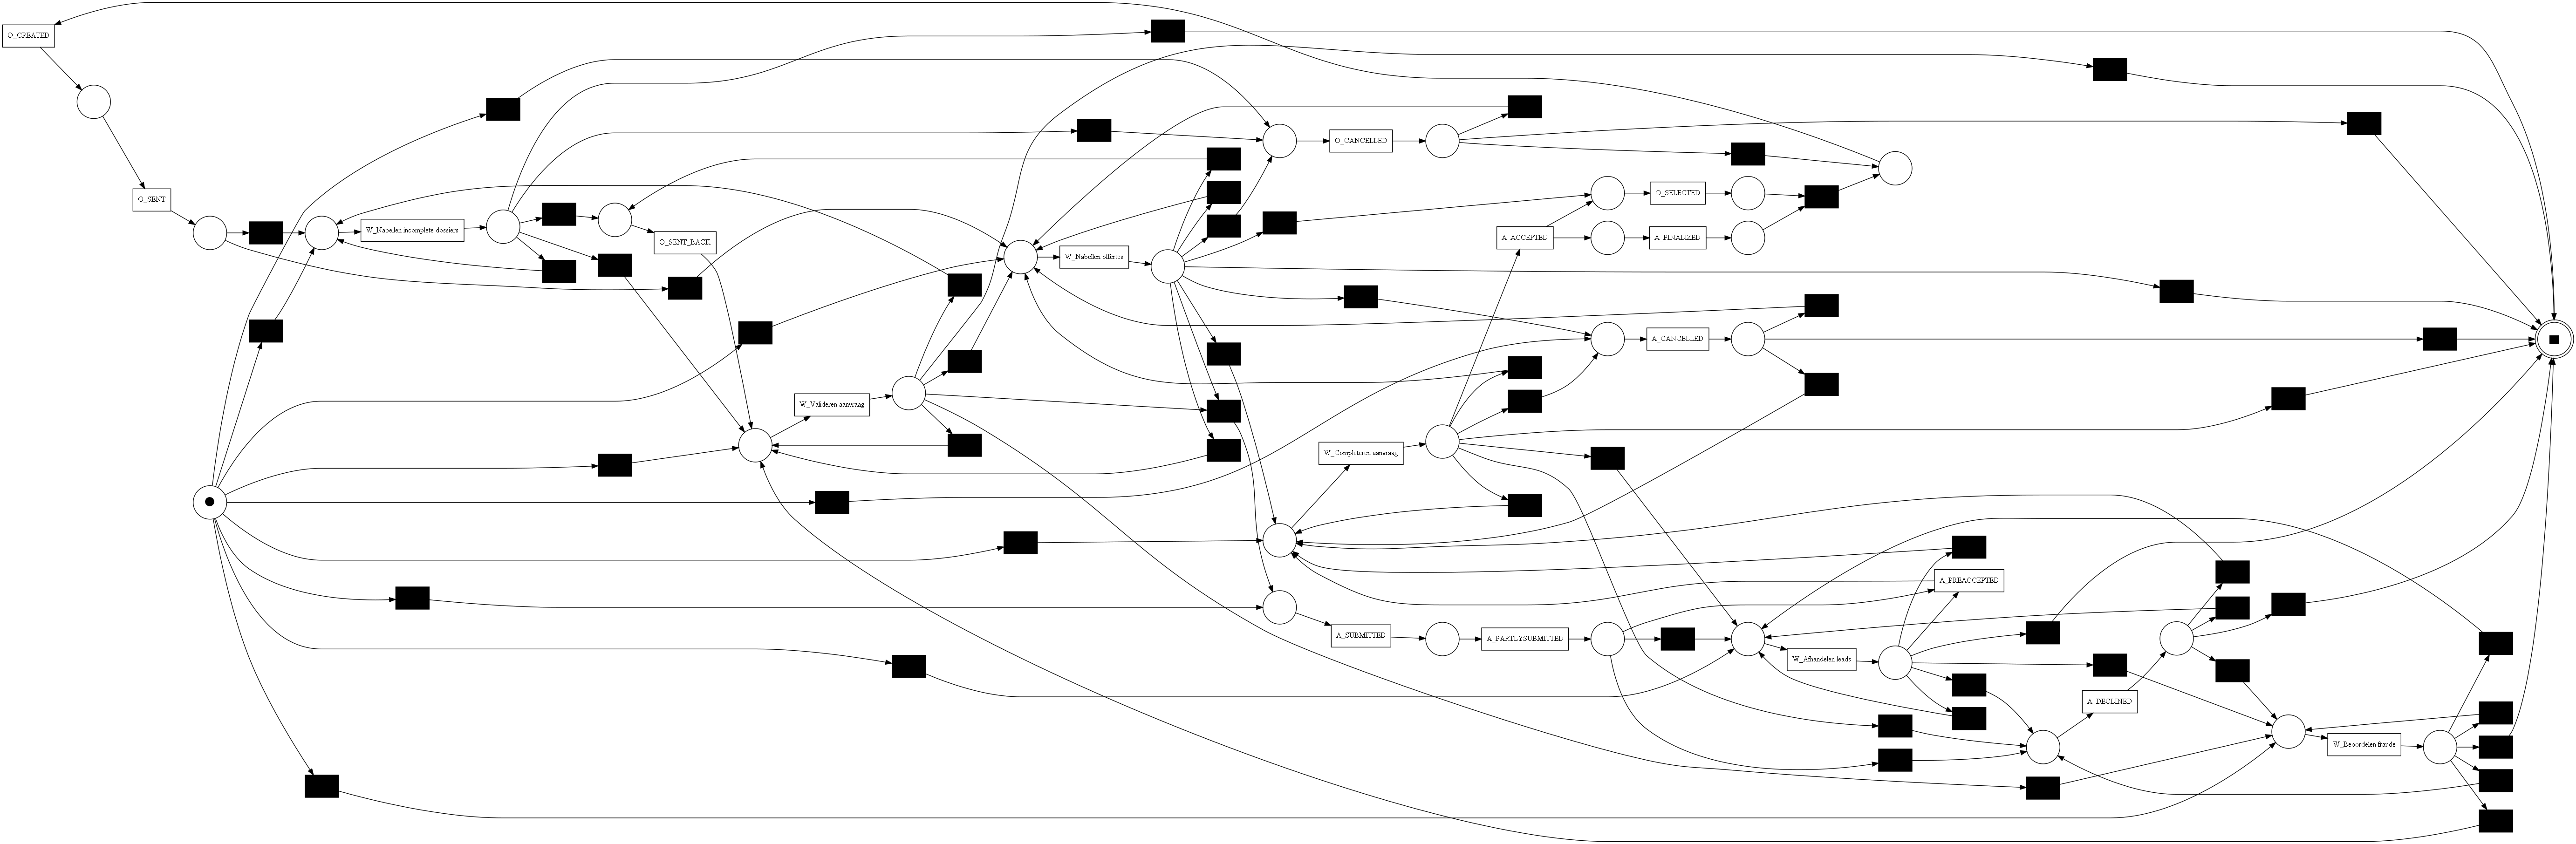

In [5]:
#Petri Net Mined From Heuristic Miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(df, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)


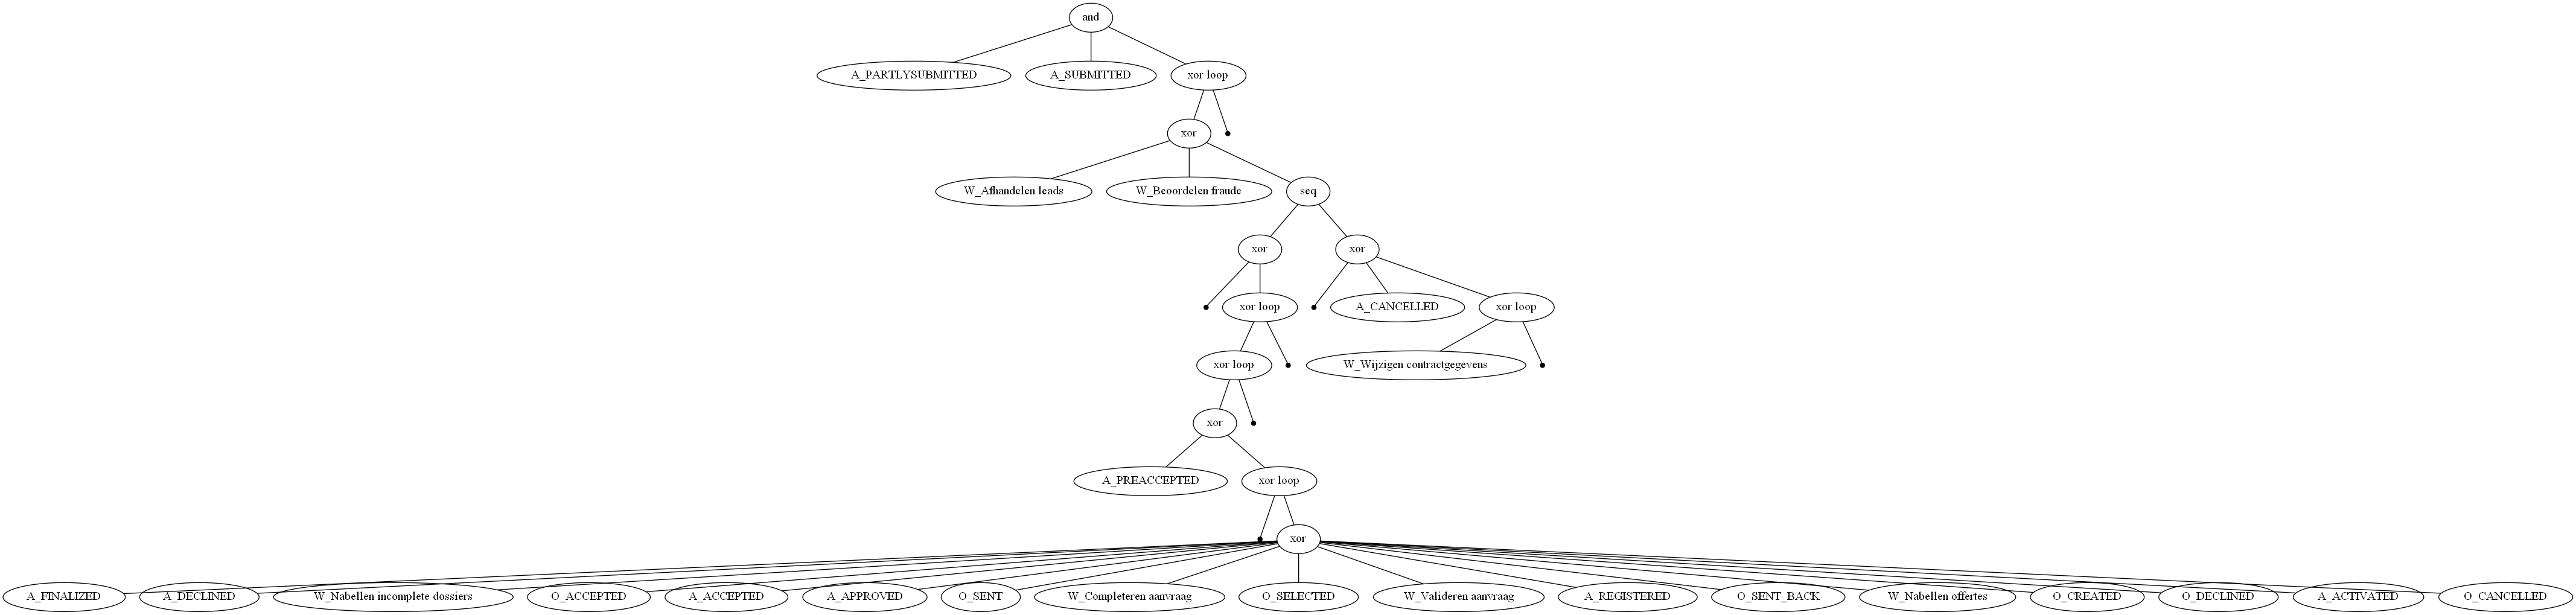

In [6]:
#Inductive Miner

import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(df)

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(df)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)


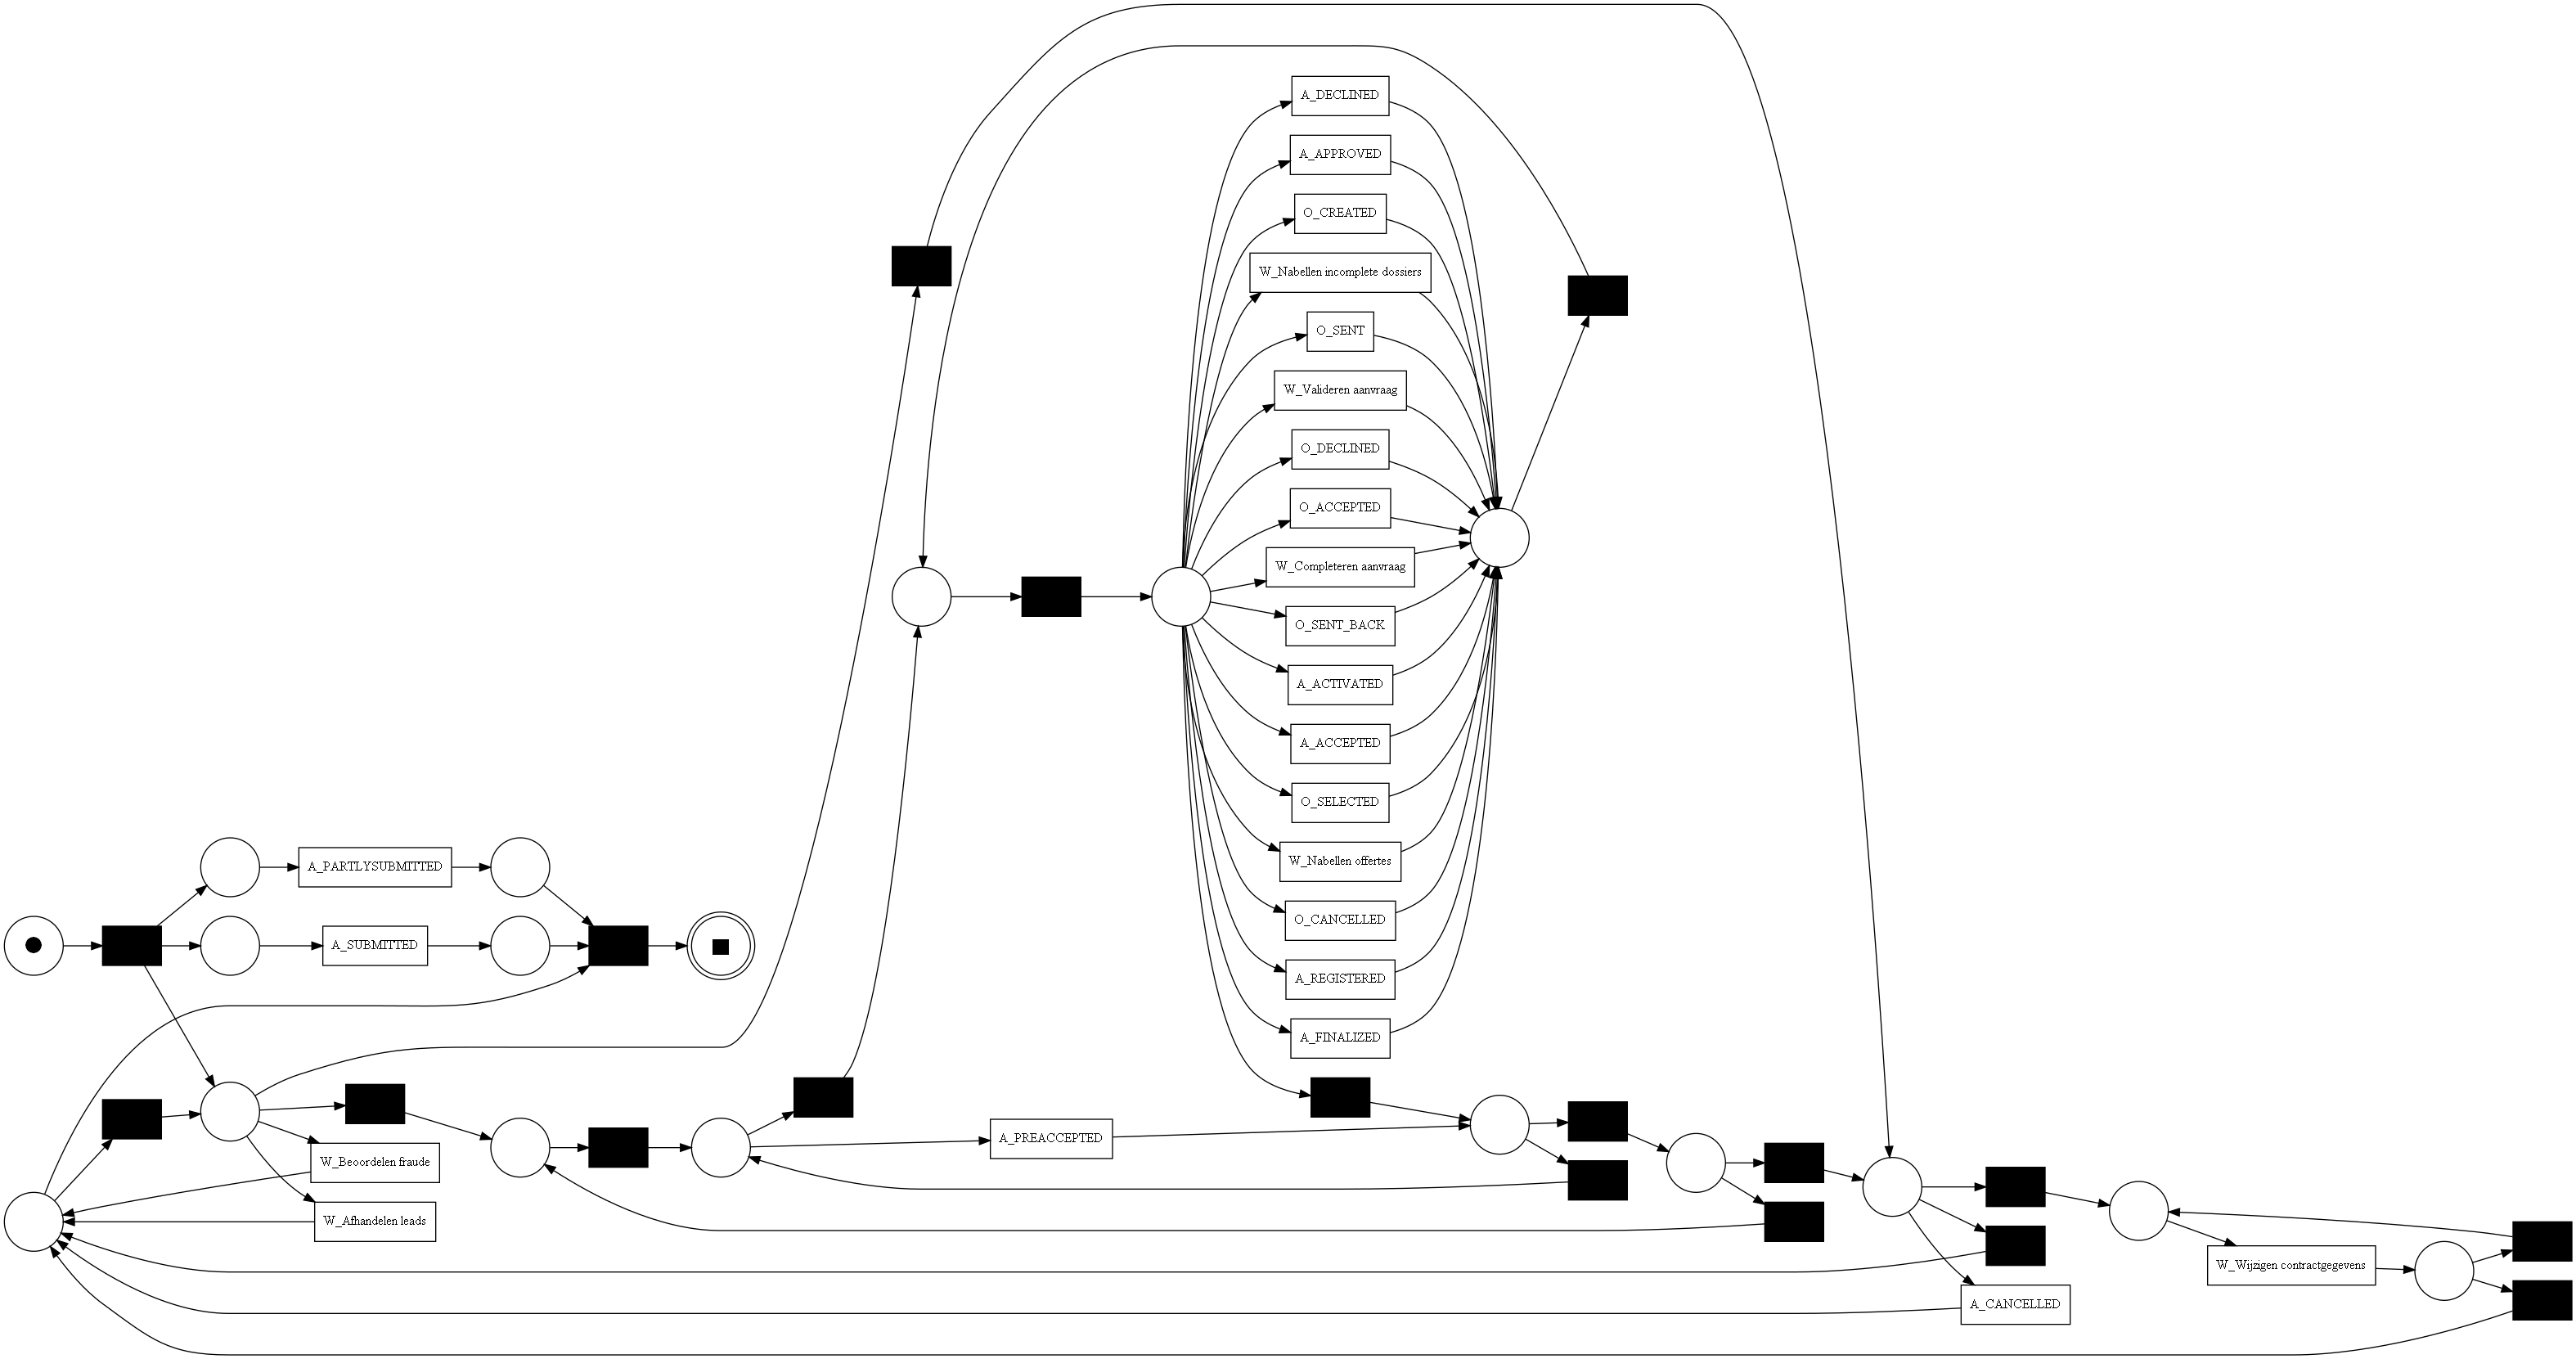

In [7]:
#Petri Net Miner From Inductive Miner

from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)
pm4py.view_petri_net(net, initial_marking, final_marking)
